### Assignment 2

* All values in percent returns
* Rolling window of past 1000 day returns, if not specified otherwise
* Assumptions are stated

1. Import the data: contains daily closing prices of the S&P 500 from Jan 02, 1990, until Dec 31, 2021.

In [64]:
library("readxl")


setwd("/Users/yongjai/Jupyter_Notebook/R/Adv_Fin/A2")

df_raw <- read_excel("SPX_series.xlsx")
colnames(df_raw) <- c('date', 'return')

head(df_raw, n=10)

date,return
1990-01-02,359.69
1990-01-03,358.76
1990-01-04,355.67
1990-01-05,352.20
1990-01-08,353.79
1990-01-09,349.62
1990-01-10,347.31
1990-01-11,348.53
1990-01-12,339.93
1990-01-15,337.00


2. Calculate daily log returns. Make descriptive statistics. Comment on them.

In [65]:
returns = log(df_raw[2:nrow(df_raw),2]) - log(df_raw[1:(nrow(df_raw)-1) ,2])
# 
N=nrow(df_raw)-1
lret = returns[,1]

library("psych")
describe(returns)
describe(df_raw)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X1,1,8063,0.0003204834,0.01140781,0.0005934463,0.0005575218,0.007423843,-0.1276521,0.109572,0.2372241,-0.4131761,11.38045,0.0001270439


Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
date,1,8064,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
return,2,8064,1421.929,898.5793,1229.29,1299.406,621.2687,295.46,4793.06,4497.6,1.326755,1.750809,10.00648


We have a large sample size with 8064 observations. The average daily log return is 0.032%. Median is 0.0593%, so we know that the data is negatively skewed (left skewed). Standard deviation is small so that we know the spread is small. Looking at the negative skewness, the tail of the left side of the distribution is longer or fatter than the tail on the right side. Looking at the kurtosis value, The dataset has heavier tails than a normal distribution. (more in the tails)

3. Calculate the 1% value-at-risk for each day, using historical simulation, and a rolling window of a) 250 days, b) 1000 days. Plot the time series of the two VaRs together in one plot. Comment on the plot.

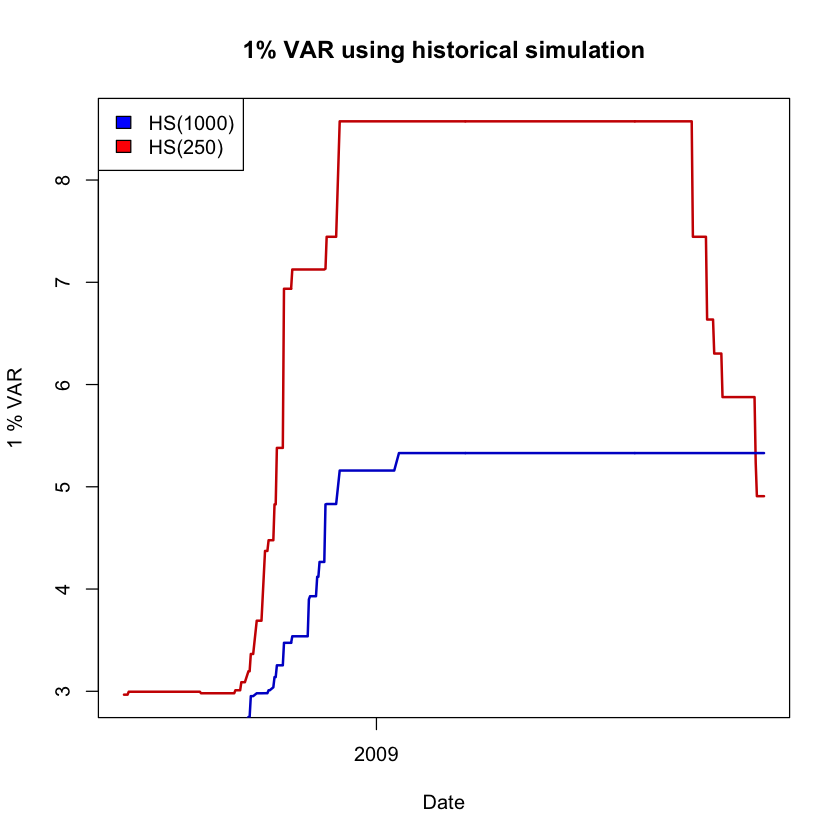

In [129]:
#####################################################
# Historical simulations (HS).
#####################################################

T <- dim(df_raw)[1]-1
VAR <- matrix(ncol=2, nrow=T - 1000 + 1)

for(t in 1000:T) {
  VAR[t-999,1] <- quantile(lret[(t-249):t], probs = 0.01)*(-100)
  VAR[t-999,2] <- quantile(lret[(t-999):t], probs = 0.01)*(-100)
}

N_VAR = dim(VAR)[1]
colnames(VAR) <- c('250_days', '1000_days')

start_t = which(dates == "2008-06-02")

plot(dates[start_t:(start_t+375)], VAR[(start_t-999):(start_t-999+375), 1], type = "l", 
     col ="red3", 
     xlab = "Date",
     ylab = "1 % VAR",
     main = '1% VAR using historical simulation',
     lwd = 2
)

lines(dates[start_t:(start_t+375)], VAR[(start_t-999):(start_t-999+375), 2], 
      col ="blue3", 
      xlab = "Date",
      ylab = "1 % VAR",
      main = '1% VAR using historical simulation',
      lwd = 2)
legend(x = "topleft", legend=c("HS(1000)", "HS(250)"),
       col=c("red3", "blue3"),
       fill = c("blue","red"))

The HS VaR with a rolling window of 250 days rises faster as the crisis gets underway and falls in the end of 2009. The HS VaR with a rolling window of 1000 days rises slower as the crisis gets underway and stays constant throughout 2009. The 1% VaR is higher for the HS VaR with a rolling window of 250 days.

4. Plot the VaR version b) from the previous question, together with days where the loss exceeds the VaR (VaR breaches). What do you find?

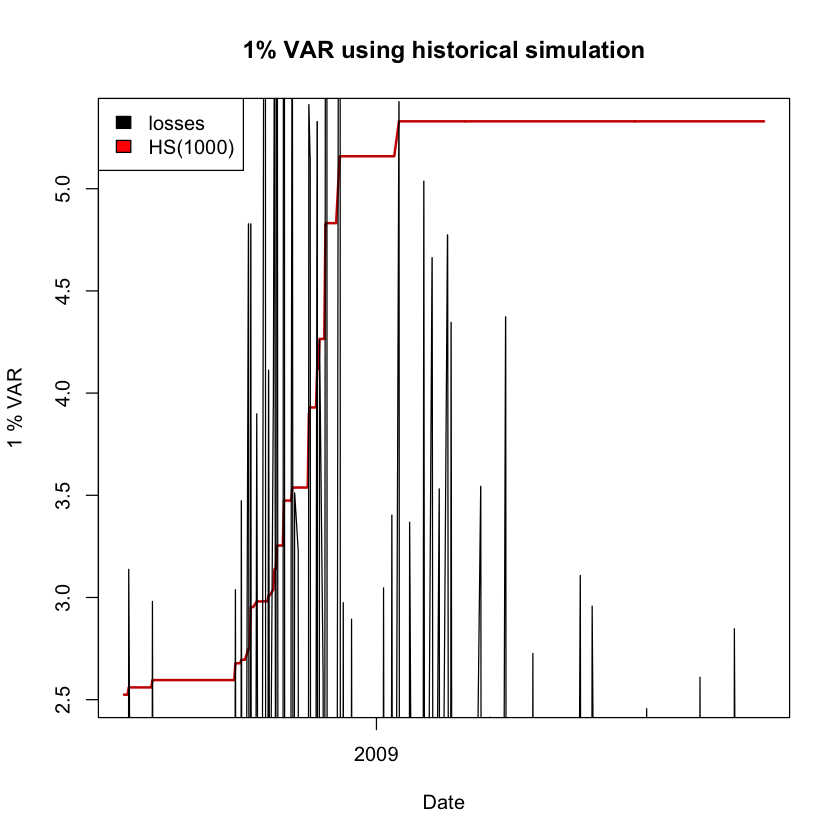

In [191]:
#####################################################
# Historical simulations (HS).
#####################################################

T <- dim(df_raw)[1]-1
VAR <- matrix(ncol=1, nrow=T - 1000 + 1)

lrret <- lret*(-100)


for(t in 1000:T) {
   VAR[t-999,1] <- quantile(lret[(t-999):t], probs = 0.01)*(-100)
}

N_VAR = dim(VAR)[1]
colnames(VAR) <- c('1000_days')

start_t = which(dates == "2008-06-02")

plot(dates[start_t:(start_t+375)], VAR[(start_t-999):(start_t-999+375), 1], type = "l", 
     col ="red3", 
     xlab = "Date",
     ylab = "1 % VAR",
     main = '1% VAR using historical simulation',
     lwd = 2
)

lines(dates[start_t:(start_t+375)], lrret[(start_t):(start_t+375)])

legend(x = "topleft", legend=c("losses","HS(1000)"),
       col=c("red3", "blue3"),
       fill = c("black","red"))


I find that VaR breaches happen mostly during the start of the crisis. After VaR reaches the peak, VaR breaches are rare. 

5. Calculate the expected shortfall using historical simulation. Use the VaR from the previous question. Calculate the average loss in case the loss exceeds the VaR. What do you find?

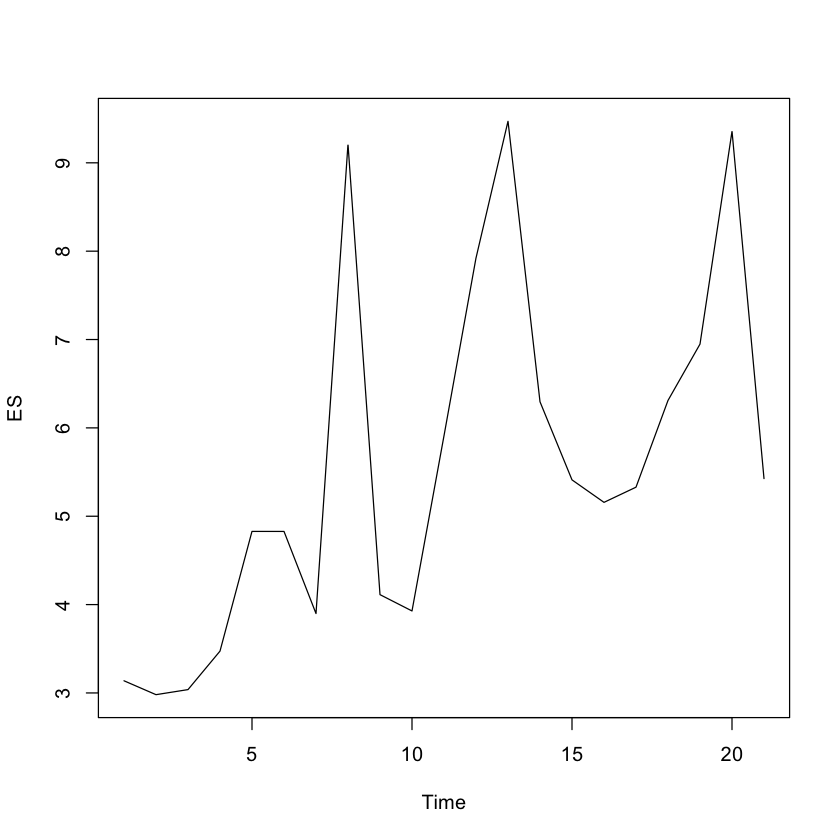

In [209]:
lrrett <- lrret[(start_t):(start_t+375)]
vaar <- VAR[(start_t-999):(start_t-999+375)]
ES_m = mean(lrrett[lrrett>vaar])
ES = (lrrett[lrrett>vaar])

plot.ts(ES)

In [210]:
ES_m

[1] 5.569487

The average loss in case the loss exceeds the VaR is 5.57%.

6. Repeat the VaR and ES calculation using weighted historical simulations (WHS). For each of the two quantities, make a plot that compares the time series of HS and WHS values.

7. Repeat Question 4 using WHS.

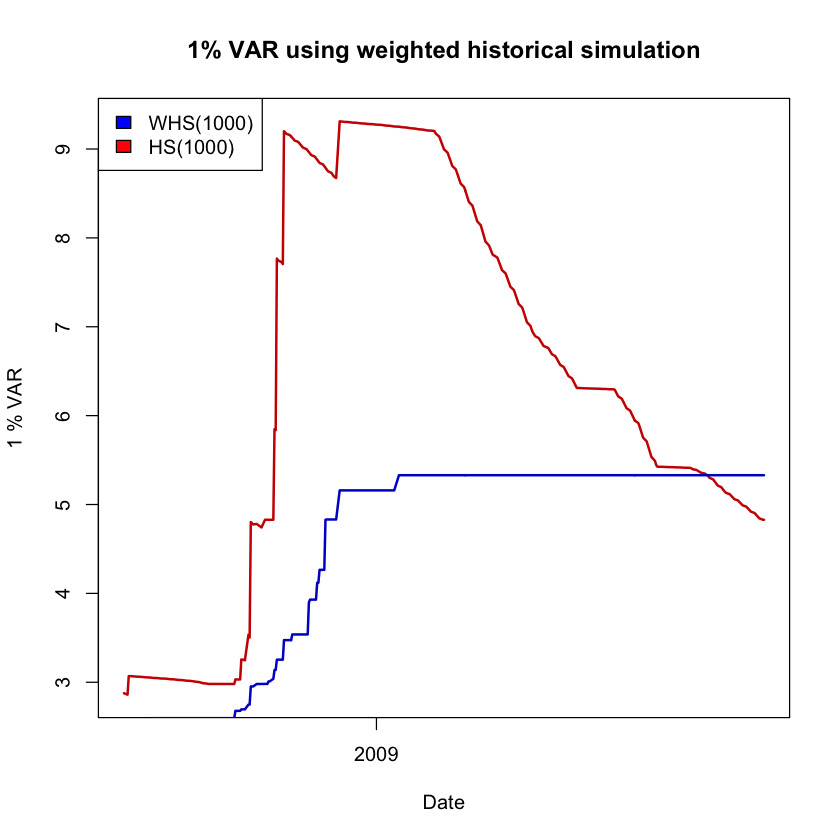

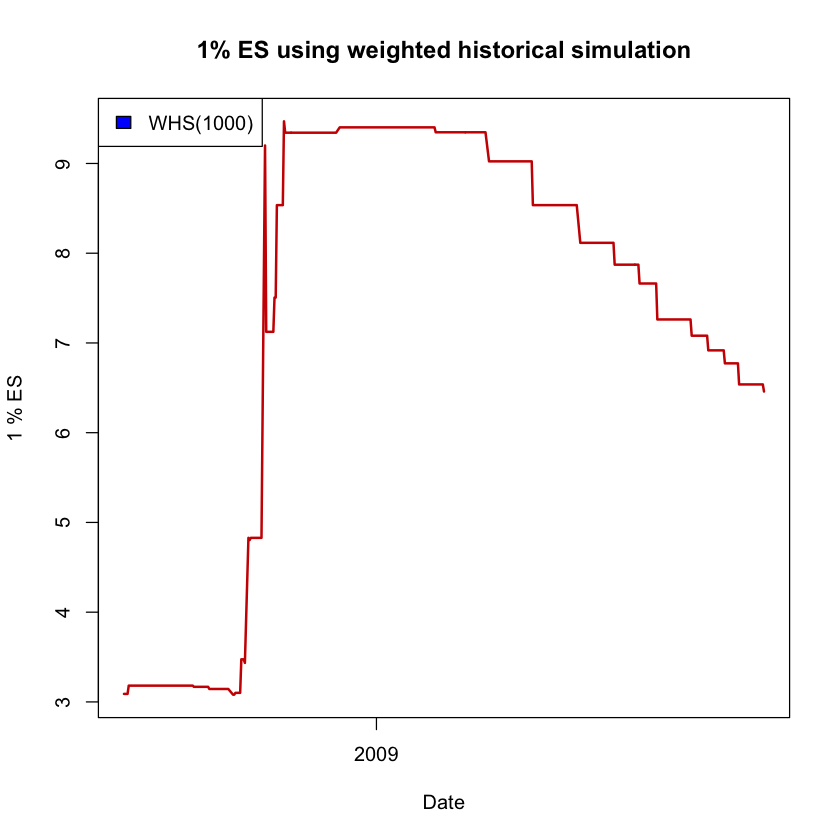

In [83]:
defaultW <- getOption("warn") 
options(warn = -1)

#####################################################
# Weighted historical simulations (WHS).
#####################################################

# We can not use the percentile function now, but have to do our own
T = dim(returns)[1]
VAR_WHS = matrix(ncol=1, nrow= T - 1000 + 1)  
ES_WHS = matrix(ncol=1, nrow= T - 1000 + 1) 
eta_par = 0.99

for(t in 1000:T) {
  past_ret = returns[(t-999):t, 1]
  # Calculate weights
  w = t((eta_par^(999:-1:0)) * (1-eta_par) / (1-eta_par^1000)) # since returns are ascending in time, weights must be ascending as well
  #sort returns and their weights descending
  index = order(past_ret, decreasing = TRUE)
  ret_sorted = sort(past_ret, decreasing = TRUE)
  
  w_sorted = w[index]
  w_sum = cumsum(w_sorted) 
  ix = sum(w_sum <= 0.99)
  # now we can either report ret_sorted(ix), or we interpolate linearly:
  vq = approx(w_sum[ix:(ix+1)], ret_sorted[ix:(ix+1)], 0.99, method="linear")$y
  VAR_WHS[(t-999),1] = vq*(-100)
  ES_WHS[(t-999),1] = sum(ret_sorted[(ix+1):length(ret_sorted)]*w_sorted[(ix+1):length(w_sorted)])/sum(w_sorted[(ix+1):length(w_sorted)])*(-100);
}


plot(dates[start_t:(start_t+375)], VAR_WHS[(start_t-999):(start_t-999+375), 1], type = "l", 
     col ="red3", 
     xlab = "Date",
     ylab = "1 % VAR",
     main = '1% VAR using weighted historical simulation',
     lwd = 2
)

lines(dates[start_t:(start_t+375)], VAR[(start_t-999):(start_t-999+375), 2], type = "l", 
     col ="blue3", 
     xlab = "Date",
     ylab = "1 % VAR",
     main = '1% VAR using weighted historical simulation',
     lwd = 2
)
legend(x = "topleft", legend=c("WHS(1000)", "HS(1000)"),
       col=c("red3", "blue3"),
       fill = c("blue","red"))




plot(dates[start_t:(start_t+375)], ES_WHS[(start_t-999):(start_t-999+375), 1], type = "l", 
     col ="red3", 
     xlab = "Date",
     ylab = "1 % ES",
     main = '1% ES using weighted historical simulation',
     lwd = 2
)

legend(x = "topleft", legend=c("WHS(1000)"),
       col=c("red3"),
       fill = c("blue"))

options(warn = defaultW)

In [212]:
ES_WHS_m = mean(ES_WHS[(start_t-999):(start_t-999+375)])
ES_WHS_m

[1] 7.324176

The average loss in case the loss exceeds the VaR is 5.57% using WHS.

8. Estimate the following GARCH model using maximum likelihood

9. Make two plots side by side. The first should contain the empirical density of the return shocks z from Eq. (1), together with a normal distribution fitted to all z’s. The second one should contain a QQ plot of the z’s versus the normal distribution. Interpret your results.

In [99]:
T <- dim(returns)[1]

# 2. filter GARCH model, calculate standardized shocks z  
  #initialize variance

sigma2 = matrix(ncol=1, nrow=T+1)
#sigma2 is h_t
filtered_shock = matrix(ncol=1, nrow=T)

#initialize for t=1
omega = 10^-6
alpha = 0.1
beta = 0.8
gamma = 0.95
mu = 10^-4

t=1
sigma2[t,1] = (var(returns) - mu)^2
sigma2[t+1] = omega + alpha*sigma2[t,1]*(1-gamma)^2 + beta*sigma2[t,1]
filtered_shock[t,1] = (returns[t,1]-mu)/sqrt(sigma2[t,1])
for(t in 2:T) {
  filtered_shock[t,1] = (returns[t,1]-mu)/sqrt(sigma2[t,1])
  sigma2[t+1] = omega + alpha*sigma2[t,1]*(1-gamma)^2 + beta*sigma2[t,1]
}

# 3. estimate xi parameter on 1.5%  most extreme returns
quantile(filtered_shock,0.015)
y = filtered_shock[filtered_shock<quantile(filtered_shock,0.015)]
T_u = length(y)
u = -max(y)
xi = 1/T_u * sum(log(-y/u))

1.5% 
-12.76402

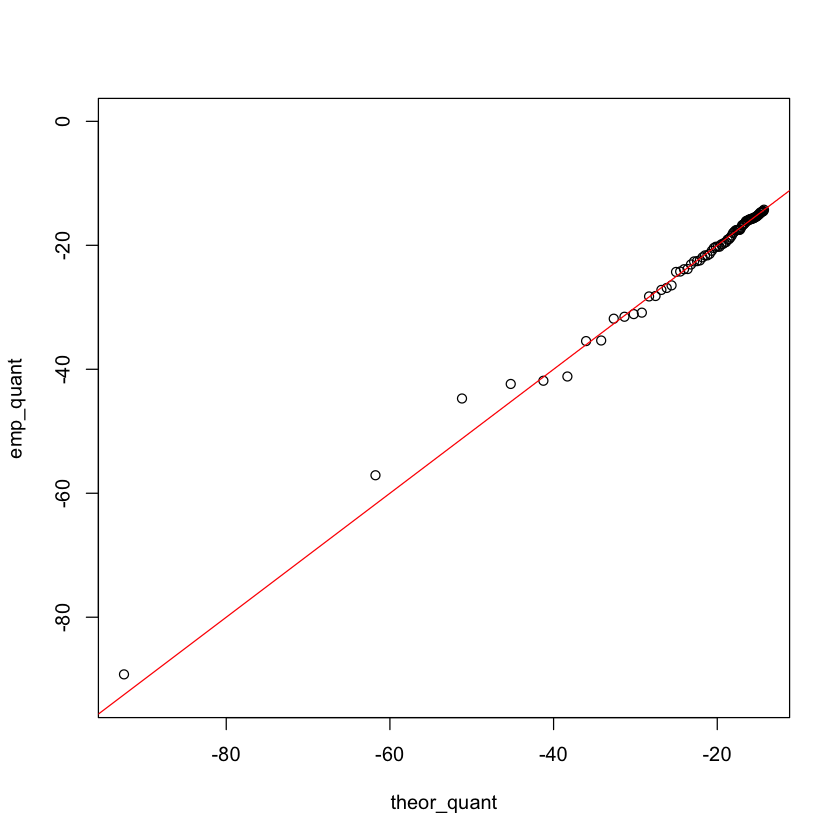

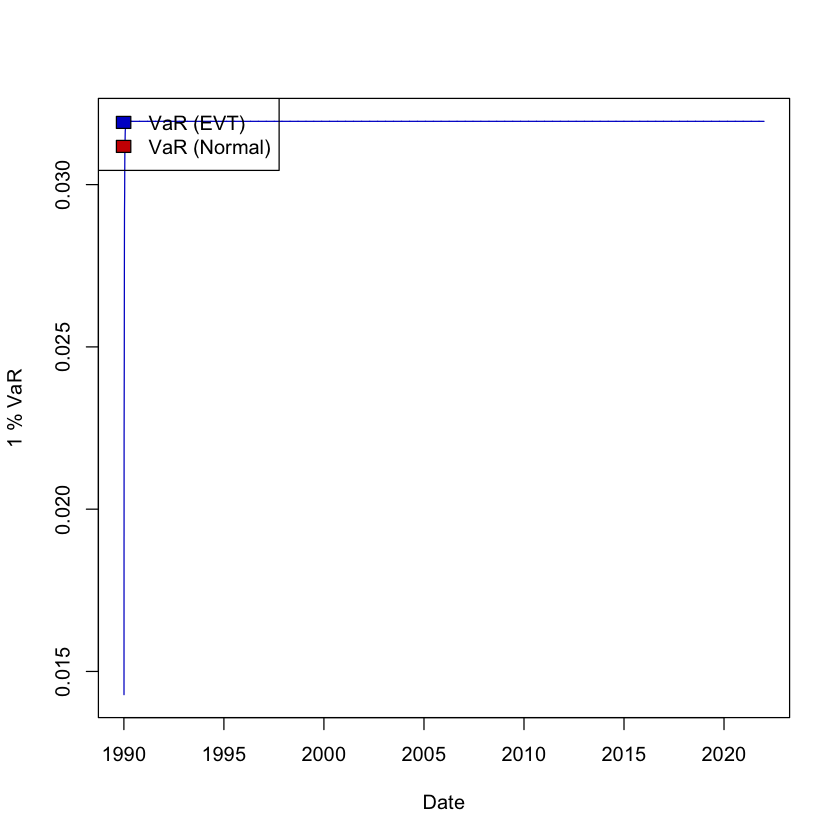

In [92]:
# 4. plot result
index = order(y, decreasing = TRUE)
p = (index-0.5)/T
theor_quant = -u*(p/(T_u/T))^(-xi)

emp_quant = y
qqplot(theor_quant,emp_quant, ylim  = c(min(y,theor_quant),0))
abline(0, 1, col = 'red')

# VAR
qunatile_001 = u*(0.01/(T_u/T))^(-xi)
VaR = sqrt(sigma2[-1]) * qunatile_001
VaR_normal = -sqrt(sigma2[-1]) * qnorm(0.01)

plot(dates, VaR, type = "l", 
     col ="blue3", 
     xlab = "Date",
     ylab = "1 % VaR",
     lwd = 1)

lines(dates, VaR_normal, type = "l", 
      col ="red3", 
      xlab = "Date",
      ylab = "1 % VaR",
      lwd = 1)
legend(x = "topleft", legend=c("VaR (EVT)","VaR (Normal)"),
       col=c("blue3", "red3"),
       fill = c("blue3", "red3"))



null device 
          1

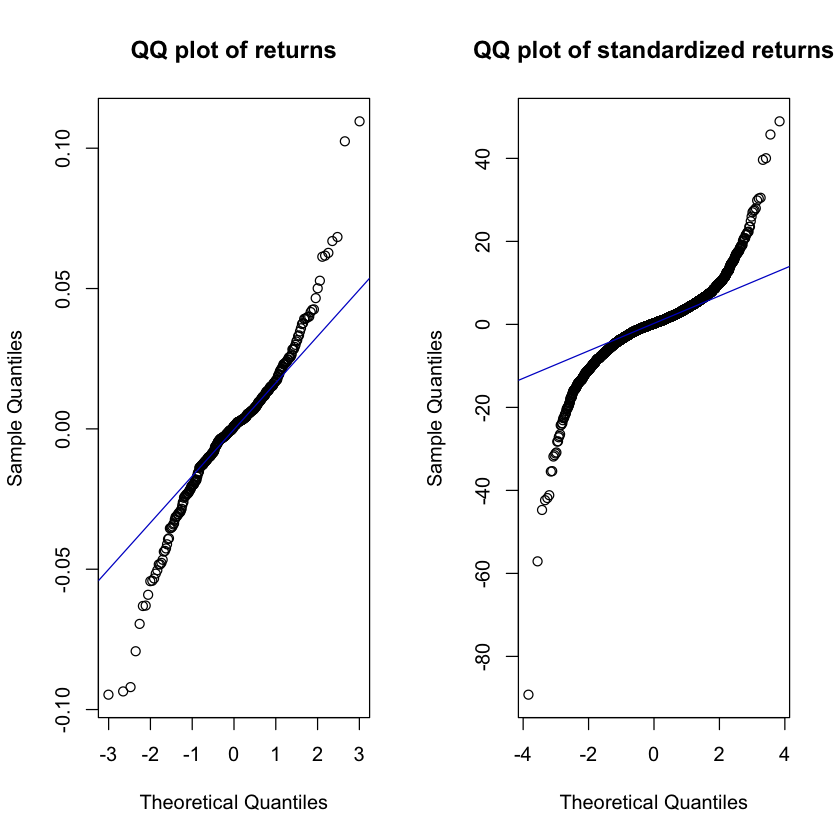

In [218]:
lrrett_d = lrrett*(-0.01)

## make QQ plots: returns vs standardized returns
par(mfrow=c(1,2))
qqnorm(lrrett_d,
       main = 'QQ plot of returns')
qqline(lrrett_d, col="blue3")
qqnorm(filtered_shock,
       main = 'QQ plot of standardized returns')
qqline(filtered_shock, col="blue3")

dev.off()#resets plot settings


In [220]:
# Time-series of VaR
plot(1:1000, VaR[251:T, 1], type = "l", 
     col ="red3", 
     xlab = "Date",
     ylab = "1 % VAR HS",
     main = 'VAR HS vs FHS',
     lwd = 2
)
lines(1:1000, VaR[251:T, 1], type = "l", 
      col ="blue3", 
      xlab = "Date",
      ylab = "1 % VAR FHS",
      main = 'VAR HS vs FHS',
      lwd = 2
)
legend(x = "topleft", legend=c("FHS", "HS"),
       col=c("red3", "blue3"),
       fill = c("blue","red"))

ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): 'x' and 'y' lengths differ


10. (5P) Calculate and plot the 1% VaR and ES for each day using the filtered historical simulation methods with a rolling window of 1000 days. Use the in-sample variance estimates from Question 8. What do you find?

1.5% 
-2.817878

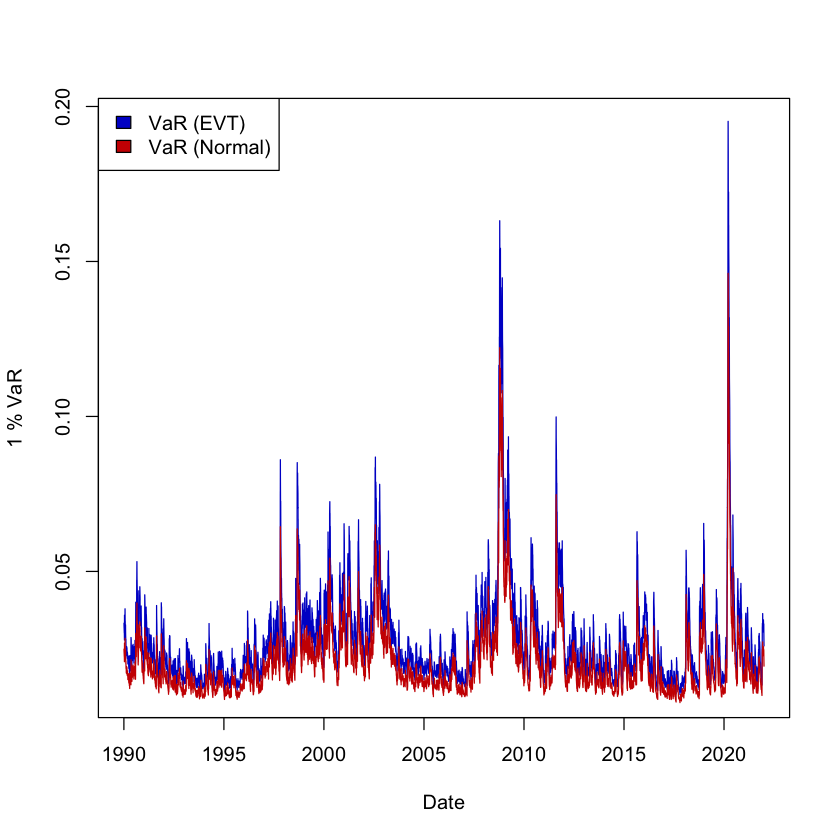

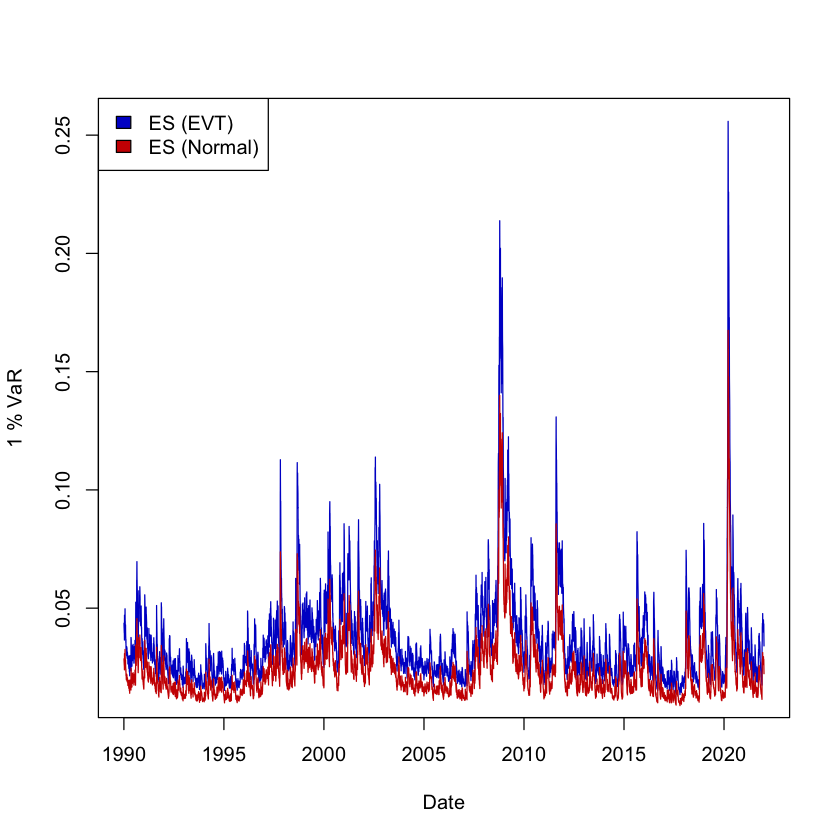

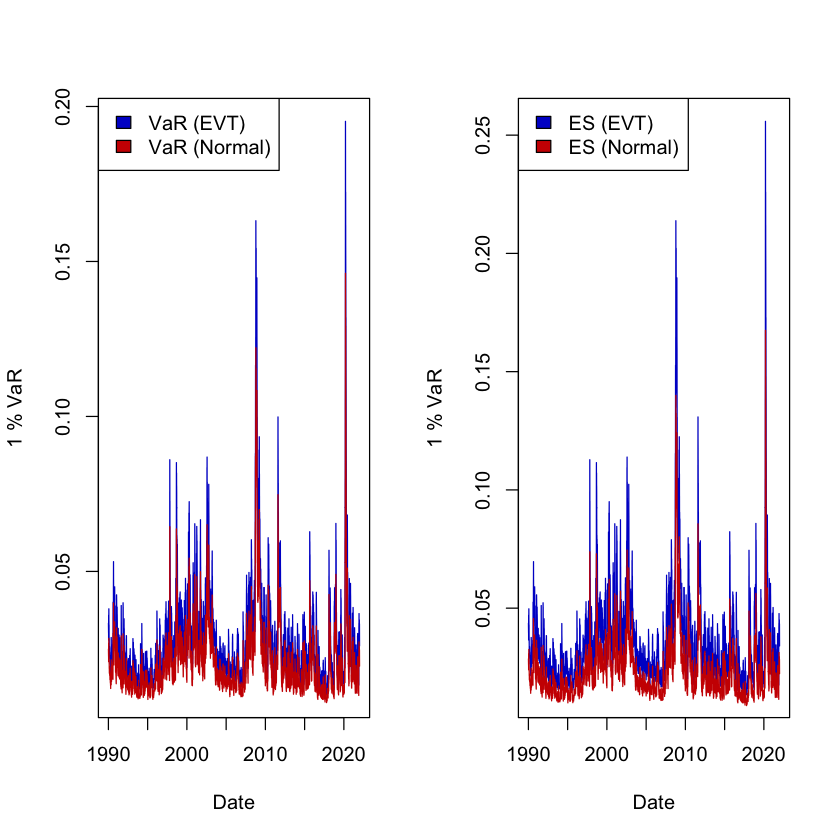

In [223]:
# 2. filter GARCH model, calculate standardized shocks z  
  #initialize variance

sigma2 = matrix(ncol=1, nrow=T+1)
filtered_shock = matrix(ncol=1, nrow=T)

#initialize for t=1
omega = 10^-6
alpha = 0.1
beta = 0.87

t=1
sigma2[t,1] = var(returns)
sigma2[t+1] = omega + beta*sigma2[t,1]+alpha*(returns[t,1])^2
filtered_shock[t,1] = returns[t,1]/sqrt(sigma2[t,1])
for(t in 2:T) {
  filtered_shock[t,1] = returns[t,1]/sqrt(sigma2[t,1])
  sigma2[t+1,1] = omega + beta*sigma2[t,1]+alpha*(returns[t,1])^2
}

# 3. estimate xi parameter on 1.5%  most extreme returns
quantile(filtered_shock,0.015)
y = filtered_shock[filtered_shock<quantile(filtered_shock,0.015)]
T_u = length(y)
u = -max(y)
xi = 1/T_u * sum(log(-y/u))

# 4. plot result
index = order(y, decreasing = TRUE)
p = (index-0.5)/T
theor_quant = -u*(p/(T_u/T))^(-xi)

emp_quant = y
#qqplot(theor_quant,emp_quant, ylim  = c(min(y,theor_quant),0))
#abline(0, 1, col = 'red')

# VAR
qunatile_001 = u*(0.01/(T_u/T))^(-xi)
VaR = sqrt(sigma2[-1]) * qunatile_001
VaR_normal = -sqrt(sigma2[-1]) * qnorm(0.01)

plot(dates, VaR, type = "l", 
     col ="blue3", 
     xlab = "Date",
     ylab = "1 % VaR",
     lwd = 1)

lines(dates, VaR_normal, type = "l", 
      col ="red3", 
      xlab = "Date",
      ylab = "1 % VaR",
      lwd = 1)
legend(x = "topleft", legend=c("VaR (EVT)","VaR (Normal)"),
       col=c("blue3", "red3"),
       fill = c("blue3", "red3"))


#ES
ES = - sqrt(sigma2[-1])*u/(xi-1)*(0.01/(T_u/T))^(-xi)
ES_normal =  sqrt(sigma2[-1])*dnorm(qnorm(0.01))/0.01

plot(dates, ES, type = "l", 
     col ="blue3", 
     xlab = "Date",
     ylab = "1 % VaR",
     lwd = 1)

lines(dates, ES_normal, type = "l", 
      col ="red3", 
      xlab = "Date",
      ylab = "1 % ES",
      lwd = 1)
legend(x = "topleft", legend=c("ES (EVT)","ES (Normal)"),
       col=c("blue3", "red3"),
       fill = c("blue3", "red3"))

#both next to each other
par(mfrow=c(1,2))
plot(dates, VaR, type = "l", 
     col ="blue3", 
     xlab = "Date",
     ylab = "1 % VaR",
     lwd = 1)

lines(dates, VaR_normal, type = "l", 
      col ="red3", 
      xlab = "Date",
      ylab = "1 % VaR",
      lwd = 1)
legend(x = "topleft", legend=c("VaR (EVT)","VaR (Normal)"),
       col=c("blue3", "red3"),
       fill = c("blue3", "red3"))

plot(dates, ES, type = "l", 
     col ="blue3", 
     xlab = "Date",
     ylab = "1 % VaR",
     lwd = 1)

lines(dates, ES_normal, type = "l", 
      col ="red3", 
      xlab = "Date",
      ylab = "1 % ES",
      lwd = 1)
legend(x = "topleft", legend=c("ES (EVT)","ES (Normal)"),
       col=c("blue3", "red3"),
       fill = c("blue3", "red3"))